## Prep

In [2]:
import numpy as np
import chardet as cd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',40)

### Create Companies DF

In [3]:
companies=pd.read_csv("D:\MS AI ML\Inv Anal 2\\companies.csv", encoding = 'Unicode_escape')
companies['permalink']=companies['permalink'].str.lower() 
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


### Create Rounds2 DF

In [4]:
rounds2=pd.read_csv("D:\MS AI ML\Inv Anal 2\\rounds2.csv", encoding = 'unicode_escape')
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


### Find Unique Values for both DFs

In [5]:
#Unique Values Rounds
unqrounds2=rounds2['company_permalink'].unique()
unqround2perm=pd.DataFrame(unqrounds2,columns=['Company_permalink_1'])

#Unique Values Companies
unqcompanies=companies['permalink'].unique()
unqcompaniesperm=pd.DataFrame(unqcompanies,columns=['Company_permalink_2'])

unqround2perm
unqcompaniesperm

,Company_permalink_2
0,/organization/-fame
1,/organization/-qounter
2,/organization/-the-one-of-them-inc-
3,/organization/0-6-com
4,/organization/004-technologies
...,...
66363,/organization/zznode-science-and-technology-co...
66364,/organization/zzzzapp-com
66365,/organization/ãeron
66366,/organization/ãasys-2


### Create Master DF (Merge Companies & Rounds 2)

In [6]:
master_frame = pd.merge(left=rounds2, right=companies, how = 'inner', left_on='company_permalink', right_on='permalink',indicator=True)
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   company_permalink        114942 non-null  object  
 1   funding_round_permalink  114942 non-null  object  
 2   funding_round_type       114942 non-null  object  
 3   funding_round_code       31139 non-null   object  
 4   funded_at                114942 non-null  object  
 5   raised_amount_usd        94958 non-null   float64 
 6   permalink                114942 non-null  object  
 7   name                     114941 non-null  object  
 8   homepage_url             108810 non-null  object  
 9   category_list            111535 non-null  object  
 10  status                   114942 non-null  object  
 11  country_code             106271 non-null  object  
 12  state_code               104003 non-null  object  
 13  region                   104782 non-null  ob

## Explore and Clean Data -  Check for duplicates, isnulls etc. 

In [7]:
#Remove leading and trailing characters
import re 

b=re.search('[\d\w\s]',' Company_permalink' )

cols = rounds2.select_dtypes(['object']).columns
rounds2[cols] = rounds2[cols].apply(lambda x: x.str.lstrip())
rounds2[cols] = rounds2[cols].apply(lambda x: x.str.rstrip())
rounds2[cols] = rounds2[cols].apply(lambda x: x.str.rstrip('\n'))

cols1 = companies.select_dtypes(['object']).columns
companies[cols1] = companies[cols1].apply(lambda x: x.str.lstrip())
companies[cols1] = companies[cols1].apply(lambda x: x.str.rstrip())
companies[cols1] = companies[cols1].apply(lambda x: x.str.rstrip('\n'))

#Check merge inner / Check and drop null values                     

master_frame['_merge'].value_counts()
master_frame= master_frame[~master_frame['raised_amount_usd'].isnull()]
master_frame['raised_amount_usd'].isnull().sum()
#master_frame.head()
master_frame['company_permalink'].describe()

count                        94958
unique                       53914
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [8]:
# Dropping Duplicates, permalink and indicator
master_frame.drop_duplicates()
master_frame=master_frame.drop(['permalink'],axis=1)
master_frame=master_frame.drop(['_merge'],axis=1)
#master_frame.info() #check df info

In [9]:
### Reorder Columns & drop duplicates
master_frame = master_frame[["company_permalink","name","funding_round_type","raised_amount_usd","funding_round_permalink","homepage_url","country_code","category_list","state_code","region","city","founded_at","funded_at","funding_round_code","status"]]
master_frame=master_frame.drop_duplicates()
#master_frame.info() #check df info

### Funding Type Analysis

In [10]:
#check to understand the df for firther analysis on fund types
master_frame['funding_round_type'].value_counts()
master_frame['funding_round_type'].describe()


count       94958
unique         14
top       venture
freq        50228
Name: funding_round_type, dtype: object

In [11]:
#Take only the 4 fundtypes needed for analysis
category= ['venture','angel','seed','private_equity']
submaster_fund_type=master_frame[master_frame['funding_round_type'].isin(category)]
submaster_fund_type['raised_amount_usd'].isnull().sum()
submaster_fund_type.info()# Check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80626 entries, 0 to 114940
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        80626 non-null  object 
 1   name                     80625 non-null  object 
 2   funding_round_type       80626 non-null  object 
 3   raised_amount_usd        80626 non-null  float64
 4   funding_round_permalink  80626 non-null  object 
 5   homepage_url             77181 non-null  object 
 6   country_code             75606 non-null  object 
 7   category_list            79771 non-null  object 
 8   state_code               74055 non-null  object 
 9   region                   74564 non-null  object 
 10  city                     74567 non-null  object 
 11  founded_at               67180 non-null  object 
 12  funded_at                80626 non-null  object 
 13  funding_round_code       28153 non-null  object 
 14  status               

### New data frame only for analysis of fund_types (5 relvant fields from 15), drop amt=0

In [12]:
ftype_df=submaster_fund_type[["company_permalink","name","funding_round_type","raised_amount_usd","country_code","category_list"]]
ftype_df=ftype_df[~(ftype_df['raised_amount_usd']==0)]
ftype_df.info() # check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80468 entries, 0 to 114940
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_permalink   80468 non-null  object 
 1   name                80467 non-null  object 
 2   funding_round_type  80468 non-null  object 
 3   raised_amount_usd   80468 non-null  float64
 4   country_code        75476 non-null  object 
 5   category_list       79628 non-null  object 
dtypes: float64(1), object(5)
memory usage: 4.3+ MB


#### Identifying outliers & Removing Outliers

In [38]:
#Identify quartiles
Q1 = ftype_df['raised_amount_usd'].quantile(0.25)
Q3 = ftype_df['raised_amount_usd'].quantile(0.75)
IQR = Q3 - Q1     
#Filter outliers
filter=(ftype_df['raised_amount_usd'] >= Q1 - 1.5 * IQR) & (ftype_df['raised_amount_usd'] <= Q3 + 1.5 *IQR)
ftype_df=ftype_df.loc[filter]
ftype_df.info()
#filter

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71911 entries, 0 to 114940
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_permalink   71911 non-null  object 
 1   name                71910 non-null  object 
 2   funding_round_type  71911 non-null  object 
 3   raised_amount_usd   71911 non-null  float64
 4   country_code        67291 non-null  object 
 5   category_list       71200 non-null  object 
dtypes: float64(1), object(5)
memory usage: 3.8+ MB


#### Boxplots of fund_types

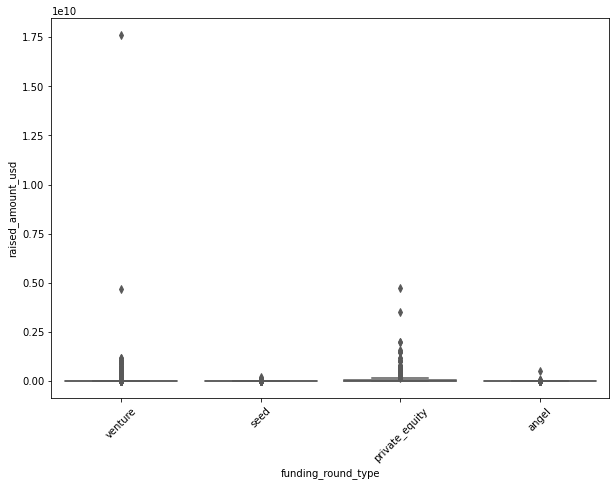

In [14]:
#Plotting a box_plot of all 4 categories
plt.figure(figsize=(10,7))
chart=sns.boxplot(x="funding_round_type",y="raised_amount_usd",data=ftype_df,palette='Set2')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.show()
#outliers for Seed very high even after cleaning data
#outliers for angel very high even after cleaning data

<ipython-input-15-5e2e7d5d5d34>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


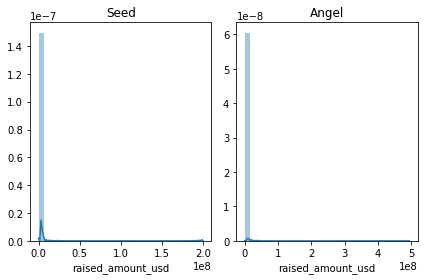

In [15]:
#Checking with Histogram for both Seed and Angel
ftype_df_seed = ftype_df[(ftype_df['funding_round_type']=='seed')]
fig, ax =plt.subplots(1,2)
g1=sns.distplot(ftype_df_seed.raised_amount_usd,bins=30,ax=ax[0]).set_title("Seed")
ftype_df_angel = ftype_df[(ftype_df['funding_round_type']=='angel')]
g2=sns.distplot(ftype_df_angel.raised_amount_usd,bins=30,ax=ax[1]).set_title("Angel")
fig.show()
fig.tight_layout()
#Both are positively skewed distribution with a long right tail, 
#for the purposes of this assignment as instructed, keeping the analysis simple and not taking into account Mean > Median > Mode

In [16]:
seed = ftype_df[ftype_df['funding_round_type']=='seed']
Q1 = seed['raised_amount_usd'].quantile(0.25)
Q3 = seed['raised_amount_usd'].quantile(0.75)
Q85= seed['raised_amount_usd'].quantile(0.85)
IQR = Q3 - Q1     
filter = (seed['raised_amount_usd'] <= Q85)
seed=seed.loc[filter]        
seed.describe()

,raised_amount_usd
count,2.045400e+04
mean,3.817162e+05
std,4.159083e+05
min,1.000000e+00
25%,5.000000e+04
50%,2.000000e+05
75%,6.000000e+05
max,1.500000e+06


<ipython-input-17-69477689b6a7>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


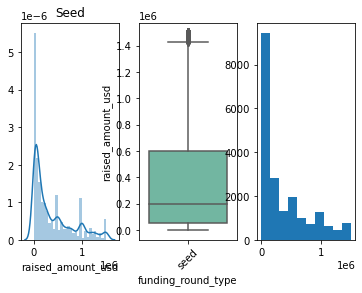

In [17]:
fig, ax =plt.subplots(1,3)
sns.distplot(seed.raised_amount_usd,bins=30,ax=ax[0]).set_title("Seed")
chart2=sns.boxplot(x="funding_round_type",y="raised_amount_usd",data=seed,palette='Set2',ax=ax[1])
plt.hist(seed.raised_amount_usd)
chart2.set_xticklabels(chart2.get_xticklabels(),rotation=45)
fig.show()

In [18]:
angel = ftype_df[ftype_df['funding_round_type']=='angel']
Q1 = angel['raised_amount_usd'].quantile(0.25)
Q3 = angel['raised_amount_usd'].quantile(0.75)
Q85= angel['raised_amount_usd'].quantile(0.85)
IQR = Q3 - Q1     
filter = (angel['raised_amount_usd'] <= Q85)
angel=angel.loc[filter]        
angel.describe()

,raised_amount_usd
count,4.109000e+03
mean,4.163525e+05
std,3.499412e+05
min,1.200000e+01
25%,1.250000e+05
50%,3.000000e+05
75%,6.125330e+05
max,1.400000e+06


<ipython-input-19-bf8ca1902bc0>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


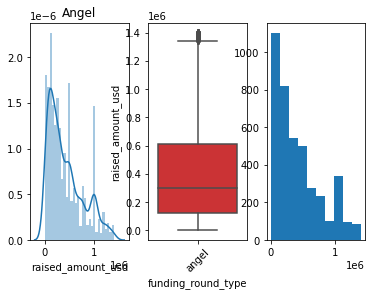

In [19]:
fig=figsize=[30,30]
fig, ax =plt.subplots(1,3)
sns.distplot(angel.raised_amount_usd,bins=30,ax=ax[0]).set_title("Angel")
chart3=sns.boxplot(x="funding_round_type",y="raised_amount_usd",data=angel,palette='Set1',ax=ax[1])
plt.hist(angel.raised_amount_usd)
chart3.set_xticklabels(chart3.get_xticklabels(),rotation=45)
fig.show()

In [20]:
venture = ftype_df[ftype_df['funding_round_type']=='venture']
#No futher treatment of outliers as none found       
venture.describe()

,raised_amount_usd
count,5.019900e+04
mean,1.175574e+07
std,8.637654e+07
min,1.000000e+00
25%,1.610000e+06
50%,5.000000e+06
75%,1.200000e+07
max,1.760000e+10


<ipython-input-21-02592177478f>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


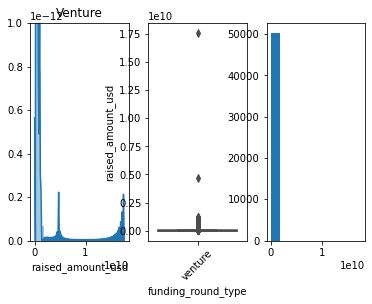

In [21]:
fig=figsize=[30,30]
fig, ax =plt.subplots(1,3)
sns.distplot(venture.raised_amount_usd,bins=30,ax=ax[0]).set_title("Venture")
chart3=sns.boxplot(x="funding_round_type",y="raised_amount_usd",data=venture,palette='Set1',ax=ax[1])
plt.hist(venture.raised_amount_usd)
chart3.set_xticklabels(chart3.get_xticklabels(),rotation=45)
fig.show()

In [22]:
private_equity = ftype_df[ftype_df['funding_round_type']=='private_equity']
#No futher outlier management carried out
private_equity.describe()

,raised_amount_usd
count,1.933000e+03
mean,7.342237e+07
std,1.982461e+08
min,6.000000e+00
25%,5.000000e+06
50%,2.000000e+07
75%,7.500000e+07
max,4.745460e+09


<ipython-input-23-af89d1473ca2>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


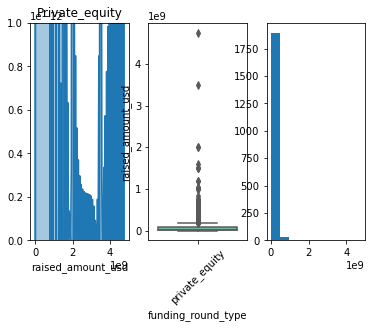

In [23]:
fig=figsize=[30,30]
fig, ax =plt.subplots(1,3)
sns.distplot(private_equity.raised_amount_usd,bins=30,ax=ax[0]).set_title("Private_equity")
chart4=sns.boxplot(x="funding_round_type",y="raised_amount_usd",data=private_equity,palette='Set2',ax=ax[1])

chart4.set_xticklabels(chart4.get_xticklabels(),rotation=45)
plt.hist(private_equity.raised_amount_usd)
fig.show()

### Analysis of funding type | Country & Category

### Top 9 countries (In Terms of Investment)

In [24]:
#Getting the top 9 countries in terms of total investement
top9=master_frame.pivot_table(index='country_code',values='raised_amount_usd',aggfunc='sum')
top9['raised_amount_usd'].nlargest(9)

country_code
USA    6.694821e+11
CHN    7.570357e+10
GBR    3.276705e+10
IND    2.768634e+10
CAN    1.842468e+10
RUS    1.127912e+10
DEU    1.001776e+10
ISR    9.713885e+09
FRA    9.059771e+09
Name: raised_amount_usd, dtype: float64

### Top 3 English Speaking Countries - USA, GBR, IND

### Sectorwise Investment Analysis

### Splitting the Category_list 

In [25]:
import re
new = master_frame['category_list'].str.split("|", n = 1, expand = True)
master_frame['category_list_split1']=new[0]
master_frame['category_list_split2']=new[1]

### Extracting Category Mapping

In [26]:
cat_map=pd.read_csv("D:\\MS AI ML\\Investment Analysis Assignment\\mapping.csv", encoding = 'Unicode_escape')
cat_map.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


### Creating Master Frame with Mapped Category Data

In [27]:
master_frame_map= pd.merge(left=master_frame, right=cat_map, how = 'inner', left_on='category_list_split1', right_on='category_list',indicator=True)
master_frame_map.tail()
mst=master_frame_map['raised_amount_usd']==0
mst.count()

88233

### Creating DFs for Top 3

In [28]:
sect_an_USA = master_frame_map[master_frame_map['country_code']=='USA']
sect_an_GBR = master_frame_map[master_frame_map['country_code']=='GBR']
sect_an_IND = master_frame_map[master_frame_map['country_code']=='IND']

#### Checking for Sum invested and frequency of investment -USA

In [29]:
sect_an_USA['raised_amount_usd'].count()
sect_an_USA['raised_amount_usd'].sum()

626802125352.0

#### Checking for Sum invested and frequency of investment -GBR

In [30]:
sect_an_GBR['raised_amount_usd'].count()
sect_an_GBR['raised_amount_usd'].sum()

30313202245.0

#### Checking for Sum invested and frequency of investment -IND

In [31]:
#sect_an_IND.head(5)
sect_an_IND['raised_amount_usd'].count()
sect_an_IND['raised_amount_usd'].sum()

26632581077.0

### Identifying Top 3 Sectors invested in the Top 3 Countries

### US Top 3 Analysis

In [32]:
sect_an_USA_pv_sectnm=sect_an_USA.pivot_table(index='category_list_split1',values='raised_amount_usd',aggfunc=sum)
sect_an_USA_pd_sectnm= pd.DataFrame(sect_an_USA_pv_sectnm)
sect_an_USA_pd_sectnm=sect_an_USA_pd_sectnm.sort_values(by='raised_amount_usd', ascending=False)
sect_an_USA_pd_sectnm

,raised_amount_usd
category_list_split1,
Biotechnology,9.429325e+10
Clean Technology,3.516836e+10
Communications Infrastructure,3.089105e+10
Software,3.028905e+10
Semiconductors,2.759712e+10
...,...
Textiles,1.700000e+04
Postal and Courier Services,1.500000e+04
Boating Industry,1.000000e+04


### GBR Top 3 Analysis

In [33]:
sect_an_GBR_pv_sectnm=sect_an_GBR.pivot_table(index='category_list_split1',values=['raised_amount_usd'],aggfunc=sum)
sect_an_GBR_pd_sectnm= pd.DataFrame(sect_an_GBR_pv_sectnm)
sect_an_GBR_pd_sectnm=sect_an_GBR_pd_sectnm.sort_values(by='raised_amount_usd', ascending=False)
sect_an_GBR_pd_sectnm

,raised_amount_usd
category_list_split1,
Biotechnology,5.311955e+09
Mobile,1.811143e+09
Software,1.442992e+09
Clean Technology,1.172647e+09
E-Commerce,1.170808e+09
...,...
Intelligent Systems,1.888500e+04
Baby Accessories,1.769300e+04
File Sharing,1.719100e+04


### IND Top 3 Analysis

In [34]:
sect_an_IND_pv_sectnm=sect_an_IND.pivot_table(index=['category_list_split1'],values='raised_amount_usd',aggfunc=sum,dropna=True)
sect_an_IND_pd_sectnm= pd.DataFrame(sect_an_IND_pv_sectnm)
sect_an_IND_pd_sectnm=sect_an_IND_pd_sectnm.sort_values(by='raised_amount_usd', ascending=False)
sect_an_IND_pd_sectnm

,raised_amount_usd
category_list_split1,
E-Commerce,7.210979e+09
Development Platforms,3.000580e+09
Clean Technology,2.177848e+09
Automotive,1.480141e+09
Mobile,1.264647e+09
...,...
Private Social Networking,3.000000e+04
Market Research,2.300000e+04
Cloud Infrastructure,2.000000e+04


#### USA High Funding companies

In [35]:
sect_an_USA_pv_sectnm=sect_an_USA.pivot_table(index=['category_list_split1','name'],values='raised_amount_usd',aggfunc=sum)
sect_an_USA_pd_sectnm= pd.DataFrame(sect_an_USA_pv_sectnm)
sect_an_USA_pd_sectnm = sect_an_USA_pd_sectnm.reset_index()
filter = (sect_an_USA_pd_sectnm['category_list_split1']=='Biotechnology') | (sect_an_USA_pd_sectnm['category_list_split1']=='Clean Technology') | (sect_an_USA_pd_sectnm['category_list_split1']=='Communications Infrastructure')
sect_an_USA_pd_sectnm_h = sect_an_USA_pd_sectnm.loc[filter]
sect_an_USA_h_pv = sect_an_USA_pd_sectnm_h.pivot_table(index=['category_list_split1','name'],values='raised_amount_usd')
sect_an_USA_pd_h = sect_an_USA_h_pv.reset_index()
sect_an_USA_pd_h.nlargest(10,'raised_amount_usd').sort_values(['raised_amount_usd','category_list_split1'],ascending=False)
type(sect_an_USA_pv_sectnm)
sect_an_USA_pd_sectnm

,category_list_split1,name,raised_amount_usd
0,3D,3D Eye Solutions,380000.0
1,3D,3D Product Imaging,240000.0
2,3D,3D-4U,750000.0
3,3D,3Derm Systems,1880000.0
4,3D,A2Zlogix,25000000.0
...,...,...,...
29125,iPhone,Twist,6000000.0
29126,iPhone,Wallit,1200000.0
29127,iPhone,Wedding Party,1000000.0
29128,iPhone,Wyst,200000.0


#### GBR High Funding companies


In [36]:
sect_an_GBR_pv_sectnm=sect_an_GBR.pivot_table(index=['category_list_split1','name'],values='raised_amount_usd',aggfunc=sum)
sect_an_GBR_pd_sectnm= pd.DataFrame(sect_an_GBR_pv_sectnm)
sect_an_GBR_pd_sectnm = sect_an_GBR_pd_sectnm.reset_index()

filter = (sect_an_GBR_pd_sectnm['category_list_split1']=='Biotechnology') | (sect_an_GBR_pd_sectnm['category_list_split1']=='Software') | (sect_an_GBR_pd_sectnm['category_list_split1']=='Mobile') 
sect_an_GBR_pd_sectnm_h = sect_an_GBR_pd_sectnm.loc[filter]
sect_an_GBR_h_pv = sect_an_GBR_pd_sectnm_h.pivot_table(index=['category_list_split1','name'],values='raised_amount_usd')
sect_an_GBR_pd_h = sect_an_GBR_h_pv.reset_index()
sect_an_GBR_pd_h.nlargest(10,'raised_amount_usd').sort_values(['raised_amount_usd','category_list_split1'],ascending=False)

,category_list_split1,name,raised_amount_usd
243,Mobile,IHS Holding,620000000.0
208,Biotechnology,Vertex Pharmaceuticals,600397225.0
102,Biotechnology,Immunocore,320000000.0
245,Mobile,Icera,244500000.0
258,Mobile,Monitise,232329416.0
91,Biotechnology,GW Pharmaceuticals,179200000.0
175,Biotechnology,ReNeuron Group,162784127.0
55,Biotechnology,Circassia,144630999.0
32,Biotechnology,BioVex,133314585.0
211,Biotechnology,Vitaldent,128660000.0


#### IND High Funding companies


In [37]:
sect_an_IND_pv_sectnm=sect_an_IND.pivot_table(index=['category_list_split1','name'],values='raised_amount_usd',aggfunc=sum)
sect_an_IND_pd_sectnm= pd.DataFrame(sect_an_IND_pv_sectnm)
sect_an_IND_pd_sectnm = sect_an_IND_pd_sectnm.reset_index()

filter = (sect_an_IND_pd_sectnm['category_list_split1']=='E-Commerce') | (sect_an_IND_pd_sectnm['category_list_split1']=='Development Platforms') | (sect_an_IND_pd_sectnm['category_list_split1']=='Clean Technology')
sect_an_IND_pd_sectnm_h = sect_an_IND_pd_sectnm.loc[filter]
sect_an_IND_h_pv = sect_an_IND_pd_sectnm_h.pivot_table(index=['category_list_split1','name'],values='raised_amount_usd')
sect_an_IND_h_pv
sect_an_IND_pd_h = sect_an_IND_h_pv.reset_index()
sect_an_IND_pd_h.nlargest(10,'raised_amount_usd').sort_values(['raised_amount_usd','category_list_split1'],ascending=False)

,category_list_split1,name,raised_amount_usd
65,E-Commerce,Flipkart,3.151140e+09
25,Development Platforms,Reliance Jio Infocomm Ltd.,3.000000e+09
112,E-Commerce,Snapdeal,1.897700e+09
95,E-Commerce,Paytm,7.000000e+08
23,Clean Technology,Welspun Energy,6.895000e+08
16,Clean Technology,ReNew Power,5.400000e+08
7,Clean Technology,Greenko Group,2.419833e+08
86,E-Commerce,Myntra,1.587500e+08
58,E-Commerce,Ecom Express,1.495000e+08
96,E-Commerce,Pepperfry.com,1.280000e+08
